In [44]:
import pandas as pd
import numpy as np

In [45]:
df= pd.read_csv('spam_ham_Dataset.csv')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [47]:
df.sample(5)

,Unnamed: 0,label,text,label_num
4029,248,ham,Subject: nominations on hpl purchase and sale ...,0
4523,975,ham,Subject: re : wholesale volumes\r\ntexas has a...,0
4689,2072,ham,Subject: enron / hpl actuals for november 17 -...,0
2423,4120,spam,"Subject: david\r\ntriplett , *\r\n75 % off for...",1
122,3361,ham,Subject: re : txu fuel deals imbalances\r\ni '...,0


In [48]:
df.shape

(5171, 4)

In [49]:
df.drop(columns=['Unnamed: 0','label'],inplace=True)

In [50]:
df.rename(columns={'label_num':'target'},inplace=True)

In [51]:
df.sample(5)

,text,target
1447,Subject: sitara availability this evening ( 06...,0
1773,Subject: re : sales to panenergy at exxon clea...,0
57,Subject: enron / hpl actuals for september 22 ...,0
3864,Subject: meter 9682\r\ngeorge -\r\nin this aft...,0
2668,Subject: perform your best in bed\r\ngeneric c...,1


In [52]:
df[["Subject","text"]] = df["text"].str.split("\r\n",n=1,expand=True)

In [53]:
for i in range(df.shape[0]):
    text = df.iloc[i]["text"]
    cleaned_text = ""
    for char in text:
        if char.isalnum() or char == ' ':
            cleaned_text += char
        else:
            cleaned_text+=' '
    df.at[i, "text"] = cleaned_text


In [54]:
df.sample(5)

,text,target,Subject
1782,vance per our conversation we have two po...,0,Subject: re : meter 984229 - roos common point...
160,fyi i can t tell if all of you were includ...,0,Subject: memo and presentation from brian redmond
1116,erectlon problems maintain your hardest ere...,1,"Subject: shi : pping is complimentar , y"
1029,gentlemen i wanted to clarify the length of...,0,Subject: cleburne outage
3022,hello vlgr professi 0 nal 1 88 per do...,1,Subject: now this acts quicker and lasts much ...


In [55]:
df.isnull().sum()

text       0
target     0
Subject    0
dtype: int64

In [56]:
df.duplicated().sum()

178

In [57]:
df= df.drop_duplicates(keep='first')

In [58]:
df.sample(5)

,text,target,Subject
1085,fo...,0,Subject: re : nom / actual vols for 24 th
3598,stacey the new deal 158220 is missing 1...,0,Subject: 1 / 2000 lower colorado river vols
4766,discount drugs save 80 every order ...,1,Subject: rock solid
3300,we are in the midst of enhancing the operation...,0,Subject: july activity driver survey
2942,enron methanol nominates the following require...,0,Subject: 02 / 00 natural gas nomination


In [59]:
df['target'].value_counts()

target
0    3531
1    1462
Name: count, dtype: int64

In [60]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [62]:
def textProcess(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalpha():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    text=y[:]
    return " ".join(text)

In [63]:
textProcess("Did you liked my presentation on ML?")

'like present ml'

In [64]:
df['transformed_text']=df['text'].apply(textProcess)

In [65]:
def subjectTransform(subject):
      return subject.replace("Subject:", "", 1).lstrip()

In [66]:
df["Subject"]=df['Subject'].apply(subjectTransform)
df["Subject"]=df['Subject'].apply(textProcess)

In [67]:
df.sample(5)

,text,target,Subject,transformed_text
4530,teco tap 10 000 enron 65 000 iferc ...,0,enron hpl actual juli,teco tap enron iferc ls hpl lsk ic enron
2073,see attached file hplno 203 xls hpl...,0,hpl nom februari,see attach file hplno xl hplno xl
1178,hi there november is here and it is time to...,0,novemb real estat news updat,hi novemb time give thank year draw close much...
333,physiotherapy agnes amend armpit i...,1,vietnam,physiotherapi agn amend armpit increas e x f u...
4353,mary please be careful of eol deals i got...,0,deal eol waha,mari pleas care eol deal got call friday even ...


In [68]:
from collections import Counter

In [26]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

spam_subject_corpus=[]
for subject in df[df['target']==1]['Subject'].tolist():
    for word in subject.split():
        spam_subject_corpus.append(word)

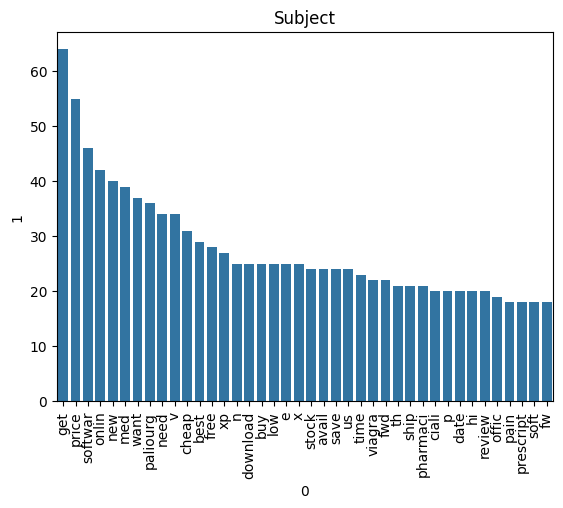

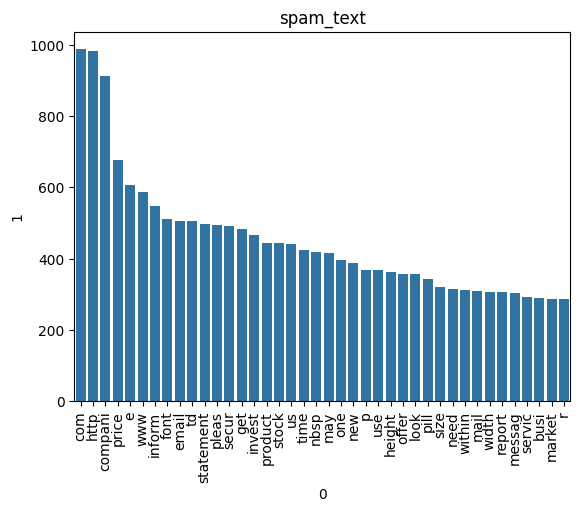

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=pd.DataFrame(Counter(spam_subject_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_subject_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.title('Subject')
plt.show()

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.title('spam_text')
plt.show()


Model Building Naive Bayes

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [70]:
cv=CountVectorizer()
y= df['target'].values
X_text= cv.fit_transform(df['transformed_text']).toarray()
X_subject= cv.fit_transform(df['Subject']).toarray()

In [30]:
X_train, X_test,Y_train,Y_test= train_test_split(X_text,y,test_size=0.2,random_state=42)


In [71]:
gnb= GaussianNB()
bnb= BernoulliNB()
mnb= MultinomialNB()


In [140]:
gnb.fit(X_train,Y_train)
y_preds1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_preds1))
print(confusion_matrix(Y_test,y_preds1))
print(precision_score(Y_test,y_preds1))

0.9469469469469469
[[713  19]
 [ 34 233]]
0.9246031746031746


In [146]:
bnb.fit(X_train,Y_train)
y_preds2=bnb.predict(X_test)
print(accuracy_score(Y_test,y_preds2))
print(confusion_matrix(Y_test,y_preds2))
print(precision_score(Y_test,y_preds2))

0.8648648648648649
[[716  16]
 [119 148]]
0.9024390243902439


In [147]:
mnb.fit(X_train,Y_train)
y_preds3=mnb.predict(X_test)
print(accuracy_score(Y_test,y_preds3))
print(confusion_matrix(Y_test,y_preds3))
print(precision_score(Y_test,y_preds3))

0.9669669669669669
[[719  13]
 [ 20 247]]
0.95


In [148]:
X_sub_train, X_sub_test, Y_train, Y_test= train_test_split(X_subject,y,test_size=0.2,random_state=42)

In [149]:
mnb.fit(X_sub_train,Y_train)
y_preds4=mnb.predict(X_sub_test)
print(accuracy_score(Y_test,y_preds4))
print(confusion_matrix(Y_test,y_preds4))
print(precision_score(Y_test,y_preds4))

0.9049049049049049
[[702  30]
 [ 65 202]]
0.8706896551724138


In [152]:
gnb.fit(X_sub_train,Y_train)
y_preds4=gnb.predict(X_sub_test)
print(accuracy_score(Y_test,y_preds4))
print(confusion_matrix(Y_test,y_preds4))
print(precision_score(Y_test,y_preds4))

0.8888888888888888
[[718  14]
 [ 97 170]]
0.9239130434782609


In [72]:
df['combined']=df['Subject']+df['text']

In [73]:
df.sample(5)

,text,target,Subject,transformed_text,combined
5060,if you re tired of traffic lights speed ca...,1,uniqu stock stuffer,tire traffic light speed camera intrus privaci...,uniqu stock stufferif you re tired of traffi...
1413,it shere it sjustforfun teotihuacan sun...,1,thel timebestsoftwarefory,shere sjustforfun teotihuacan sunblind sweat w...,thel timebestsoftwareforyit shere it sjus...
2467,daren there is flow at meter 1386 for jan 1 ...,0,jan,daren flow meter jan averag flow day last deal...,jandaren there is flow at meter 1386 for jan...
38,fo...,0,th nom copano,forward ami chokshi corp enron troy benoit rel...,th nom copano ...
2702,endgame biomedicine protestantizes parted twi...,1,new softwar pyrrhic taxonomi,endgam biomedicin protestant part twirl mohamm...,new softwar pyrrhic taxonomiendgame biomedicin...


In [74]:
X_combined= cv.fit_transform(df['combined']).toarray()

In [75]:
X_combined_train,X_combined_test,Y_train,Y_test=train_test_split(X_combined,y,test_size=0.2,random_state=42)

In [76]:
gnb1=GaussianNB()
mnb=MultinomialNB()

In [218]:
gnb1.fit(X_combined_train,Y_train)
y_preds4=gnb1.predict(X_combined_test)
print(accuracy_score(Y_test,y_preds4))
print(confusion_matrix(Y_test,y_preds4))
print(precision_score(Y_test,y_preds4))

0.9679679679679679
[[720  12]
 [ 20 247]]
0.9536679536679536


In [77]:
mnb.fit(X_combined_train,Y_train)
y_preds4=mnb.predict(X_combined_test)
print(accuracy_score(Y_test,y_preds4))
print(confusion_matrix(Y_test,y_preds4))
print(precision_score(Y_test,y_preds4))

0.980980980980981
[[722  10]
 [  9 258]]
0.9626865671641791


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_combined=tfidf.fit_transform(df['combined']).toarray()

In [37]:
X_combined_train,X_combined_test,Y_train,Y_test=train_test_split(X_combined,y,test_size=0.2,random_state=42)

In [209]:
mnb1.fit(X_combined_train,Y_train)
y_preds4=mnb1.predict(X_combined_test)
print(accuracy_score(Y_test,y_preds4))
print(confusion_matrix(Y_test,y_preds4))
print(precision_score(Y_test,y_preds4))

0.8798798798798799
[[732   0]
 [120 147]]
1.0


In [210]:
gnb1.fit(X_combined_train,Y_train)
y_preds4=gnb1.predict(X_combined_test)
print(accuracy_score(Y_test,y_preds4))
print(confusion_matrix(Y_test,y_preds4))
print(precision_score(Y_test,y_preds4))

0.953953953953954
[[703  29]
 [ 17 250]]
0.8960573476702509


In [213]:
bnb1=BernoulliNB()

In [220]:
bnb1.fit(X_combined_train,Y_train)
y_preds4=bnb1.predict(X_combined_test)
print(accuracy_score(Y_test,y_preds4))
print(confusion_matrix(Y_test,y_preds4))
print(precision_score(Y_test,y_preds4))

0.8768768768768769
[[718  14]
 [109 158]]
0.9186046511627907


In [31]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [32]:
etc=ExtraTreesClassifier(n_estimators=50,random_state=42)
rfc= RandomForestClassifier(n_estimators=50,random_state=42)

In [33]:
clfs={
    'ETC':etc,
    'RFC':rfc,
    'MultiNB':mnb,
    'GaussNB':gnb
}

In [34]:
def train_classifier(clf,X_train,X_test,Y_train,Y_test):
    clf.fit(X_train,Y_train)
    y_preds=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_preds)
    precision=precision_score(Y_test,y_preds)
    return accuracy,precision

In [48]:
X_combined_train,X_combined_test,Y_train,Y_test=train_test_split(X_combined,y,test_size=0.2,random_state=42)
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_combined_train,X_combined_test,Y_train,Y_test)
    print("for ",name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


for  ETC
Accuracy:  0.9519519519519519
Precision:  0.9362549800796812
for  RFC
Accuracy:  0.9579579579579579
Precision:  0.9377431906614786
for  MultiNB
Accuracy:  0.980980980980981
Precision:  0.9626865671641791
for  GaussNB
Accuracy:  0.9679679679679679
Precision:  0.9536679536679536


In [47]:
X_train, X_test,Y_train,Y_test= train_test_split(X_text,y,test_size=0.2,random_state=42)
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,X_test,Y_train,Y_test)
    print("for ",name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  ETC
Accuracy:  0.960960960960961
Precision:  0.9222222222222223
for  RFC
Accuracy:  0.960960960960961
Precision:  0.9285714285714286
for  MultiNB
Accuracy:  0.9669669669669669
Precision:  0.95
for  GaussNB
Accuracy:  0.9469469469469469
Precision:  0.9246031746031746


In [51]:
pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

,Algorithm,Accuracy,Precision
0,ETC,0.951952,0.936255
1,RFC,0.957958,0.937743
2,MultiNB,0.980981,0.962687
3,GaussNB,0.967968,0.953668


In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
voting = VotingClassifier(estimators=[('gnb',gnb),('multiNB',mnb)],voting='soft')

In [38]:
voting.fit(X_combined_train,Y_train)

VotingClassifier(estimators=[('gnb', GaussianNB()),
                             ('multiNB', MultinomialNB())],
                 voting='soft')

In [39]:
y_preds=voting.predict(X_combined_test)

In [43]:
print("Accuracy ",accuracy_score(Y_test,y_preds))
print("Precision ",precision_score(Y_test,y_preds))

Accuracy  0.970970970970971
Precision  0.96484375


In [79]:
import pickle
pickle.dump(cv,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [81]:
df.iloc[45]['text']

'vance    deals   348725   6   10   6   30   and   348729   7   1   7   31   have been created and  entered in sitara for hesco    hillary    do not confirm    bob  vance l taylor  07   28   2000 01   24 pm  to   robert cotten   hou   ect   ect  cc   lisa hesse   hou   ect   ect   trisha hughes   hou   ect   ect   heidi  withers   hou   ect   ect   hillary mack   corp   enron   enron   susan smith   hou   ect   ect    donald p reinhardt   hou   ect   ect   melissa graves   hou   ect   ect  subject   new production   sitara deals needed  bob    the following production is now on   line and a ticket should be created and  entered into sitara based on the following    counterparty meter volumes price period  hesco gathering oil co 9835 600 mmbtu   d 96   gas daily less   0   14  6   10   7   31  samson lone star limited 9845 3000 mmbtu   d 100   gas daily less   0   10 7   21    7   31  winn exploration co     inc   9847 800 mmbtu   d 100   gas daily less   0   13 7   25    7   31    for 